In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data from the CSV file
data = pd.read_csv('Biomechanics Analysis - Metadata Raw.csv')

# Extract features and pitch speed from the data
features = data[['session_mass_kg', 'session_height_m', 'age_yrs', 'playing_level']]
pitch_speed_mph = data['pitch_speed_mph'].values

# Categorical column (playing_level) needs to be one-hot encoded
categorical_cols = ['playing_level']
numerical_cols = ['session_mass_kg', 'session_height_m', 'age_yrs']

# Create a preprocessor for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('scaler', 'passthrough')])  # You can use StandardScaler or other scalers here
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline with the preprocessor and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(features, pitch_speed_mph)

# Predict pitch speed using the model
predicted_pitch_speeds = model.predict(features)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(pitch_speed_mph, predicted_pitch_speeds)
print("Mean Squared Error:", mse)

# Print the coefficients (excluding one-hot encoded columns)
coefficients = model.named_steps['regressor'].coef_
print("Coefficients (excluding one-hot encoded columns):", coefficients)

# Print the intercept
intercept = model.named_steps['regressor'].intercept_
print("Intercept:", intercept)


Mean Squared Error: 16.069501860133627
Coefficients (excluding one-hot encoded columns): [ 1.68666122e-02  1.99109984e+01  7.59447766e-01  1.73180453e+00
 -2.46646939e+00 -1.33755153e+00  2.07221638e+00]
Intercept: 29.037389458247993


Mean Squared Error: 16.069501860133627


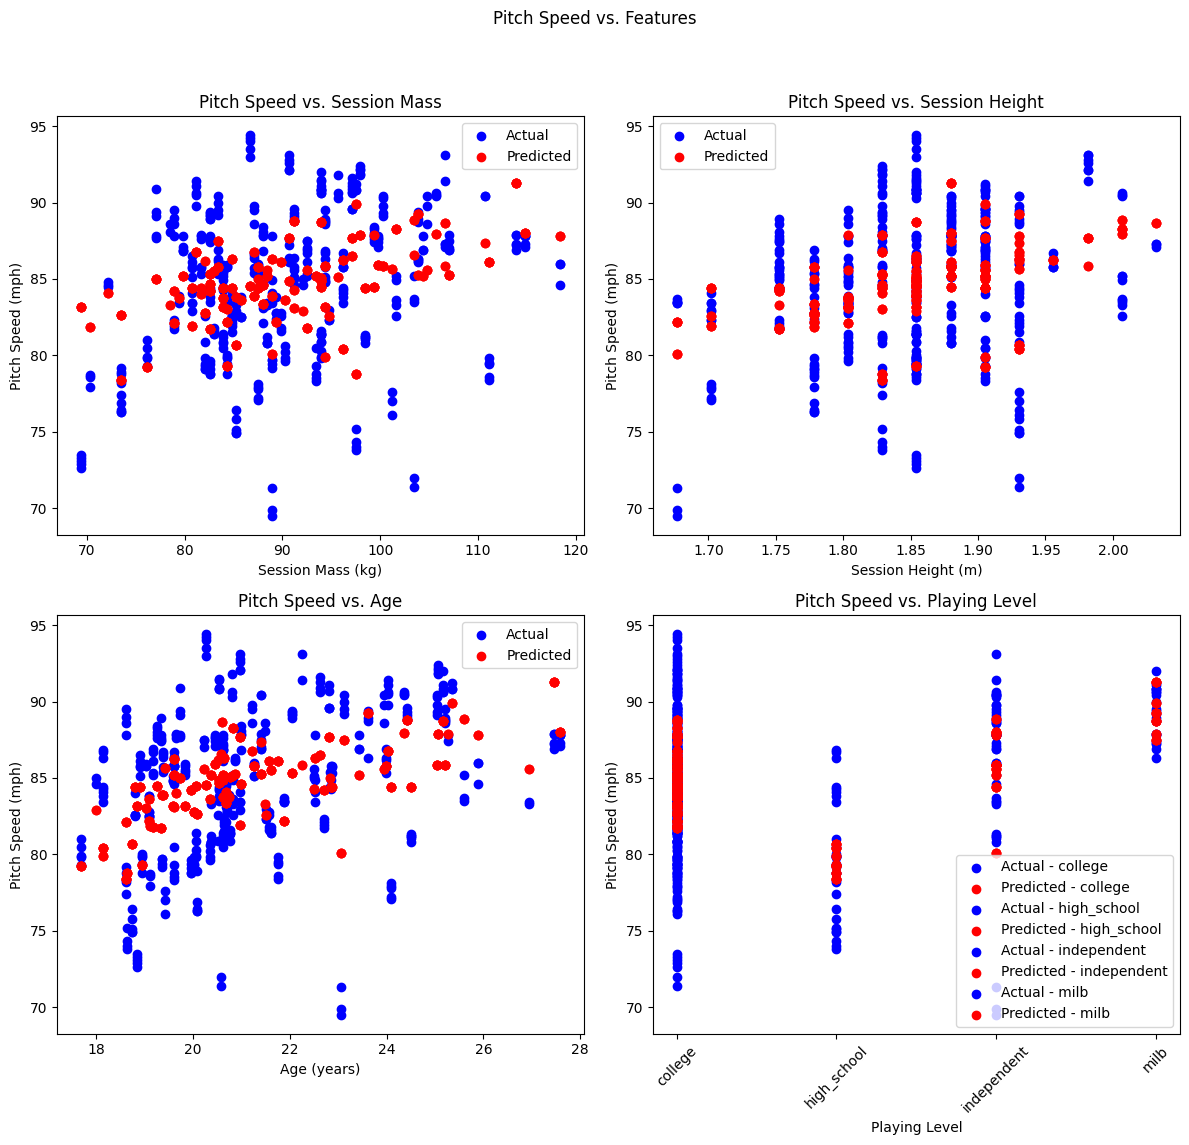

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data from the CSV file
data = pd.read_csv('Biomechanics Analysis - Metadata Raw.csv')

# Extract features and pitch speed from the data
features = data[['session_mass_kg', 'session_height_m', 'age_yrs', 'playing_level']]
pitch_speed_mph = data['pitch_speed_mph'].values

# Categorical column (playing_level) needs to be one-hot encoded
categorical_cols = ['playing_level']
numerical_cols = ['session_mass_kg', 'session_height_m', 'age_yrs']

# Create a preprocessor for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('scaler', 'passthrough')])  # You can use StandardScaler or other scalers here
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline with the preprocessor and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(features, pitch_speed_mph)

# Predict pitch speed using the model
predicted_pitch_speeds = model.predict(features)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(pitch_speed_mph, predicted_pitch_speeds)
print("Mean Squared Error:", mse)

# Visualize results for session_mass_kg, session_height_m, age_yrs, playing_level
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Pitch Speed vs. Features')

axes[0, 0].scatter(features['session_mass_kg'], pitch_speed_mph, color='blue', label='Actual')
axes[0, 0].scatter(features['session_mass_kg'], predicted_pitch_speeds, color='red', label='Predicted')
axes[0, 0].set_xlabel('Session Mass (kg)')
axes[0, 0].set_ylabel('Pitch Speed (mph)')
axes[0, 0].set_title('Pitch Speed vs. Session Mass')
axes[0, 0].legend()

axes[0, 1].scatter(features['session_height_m'], pitch_speed_mph, color='blue', label='Actual')
axes[0, 1].scatter(features['session_height_m'], predicted_pitch_speeds, color='red', label='Predicted')
axes[0, 1].set_xlabel('Session Height (m)')
axes[0, 1].set_ylabel('Pitch Speed (mph)')
axes[0, 1].set_title('Pitch Speed vs. Session Height')
axes[0, 1].legend()

axes[1, 0].scatter(features['age_yrs'], pitch_speed_mph, color='blue', label='Actual')
axes[1, 0].scatter(features['age_yrs'], predicted_pitch_speeds, color='red', label='Predicted')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Pitch Speed (mph)')
axes[1, 0].set_title('Pitch Speed vs. Age')
axes[1, 0].legend()

playing_levels = data['playing_level'].unique()
playing_levels.sort()
axes[1, 1].set_xticks(range(len(playing_levels)))
axes[1, 1].set_xticklabels(playing_levels, rotation=45)
for level in playing_levels:
    axes[1, 1].scatter(features[features['playing_level'] == level]['playing_level'], pitch_speed_mph[features['playing_level'] == level],
                       color='blue', label=f'Actual - {level}')
    predicted_speeds = model.predict(features[features['playing_level'] == level])
    axes[1, 1].scatter(features[features['playing_level'] == level]['playing_level'], predicted_speeds,
                       color='red', label=f'Predicted - {level}')
axes[1, 1].set_xlabel('Playing Level')
axes[1, 1].set_ylabel('Pitch Speed (mph)')
axes[1, 1].set_title('Pitch Speed vs. Playing Level')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [4]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read data from the CSV file
data = pd.read_csv('Biomechanics Analysis - Metadata Raw.csv')

# Extract features and pitch speed from the data
features = data[['session_mass_kg', 'session_height_m', 'age_yrs', 'playing_level']]
pitch_speed_mph = data['pitch_speed_mph'].values

# Categorical column (playing_level) needs to be one-hot encoded
categorical_cols = ['playing_level']
numerical_cols = ['session_mass_kg', 'session_height_m', 'age_yrs']

# Create a preprocessor for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('scaler', 'passthrough')])  # You can use StandardScaler or other scalers here
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline with the preprocessor and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(features, pitch_speed_mph)

# Create a grid of values for each feature
mass_values = np.linspace(min(features['session_mass_kg']), max(features['session_mass_kg']), num=10)
height_values = np.linspace(min(features['session_height_m']), max(features['session_height_m']), num=10)
age_values = np.linspace(min(features['age_yrs']), max(features['age_yrs']), num=10)
playing_levels = data['playing_level'].unique()

# Generate all possible combinations of feature values
combinations = product(mass_values, height_values, age_values, playing_levels)

# Find the combination that yields the highest predicted pitch speed
best_combination = None
best_pitch_speed = float('-inf')

for combination in combinations:
    combination_dict = {
        'session_mass_kg': combination[0],
        'session_height_m': combination[1],
        'age_yrs': combination[2],
        'playing_level': combination[3]
    }
    pitch_speed = model.predict(pd.DataFrame(combination_dict, index=[0]))
    if pitch_speed > best_pitch_speed:
        best_pitch_speed = pitch_speed
        best_combination = combination_dict

print("Best Combination:", best_combination)
print("Best Pitch Speed:", best_pitch_speed)


Best Combination: {'session_mass_kg': 118.3896, 'session_height_m': 2.032, 'age_yrs': 27.59, 'playing_level': 'milb'}
Best Pitch Speed: [94.51874993]
